In [1]:
import os
import numpy as np
import pandas as pd
import pegasus as pg
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

In [2]:
if not os.path.isdir('ED_Figure_8'):
    os.mkdir('ED_Figure_8')
    
if not os.path.isdir('Figure_4'):
    os.mkdir('Figure_4')

## WTA data

In [3]:
input_files = [
    'data/Broad-COVID_WTA_Q3Norm_TargetCountMatrix.txt',
    'data/Broad-COVID_WTA_SegmentProperties.txt',
    'data/annotation_file_wta.txt'
]
data = pg.read_input(input_files)
data.log_transform()
data._inplace_subset_obs(data.obs['Patient_ID'] != 'None')
pg.calc_signature_score(data, 'utils/lung_spatial_markers.gmt')

2021-04-05 15:21:41,663 - pegasusio.readwrite - INFO - nanostring file '['data/Broad-COVID_WTA_Q3Norm_TargetCountMatrix.txt', 'data/Broad-COVID_WTA_SegmentProperties.txt', 'data/annotation_file_wta.txt']' is loaded.
2021-04-05 15:21:41,664 - pegasusio.readwrite - INFO - Function 'read_input' finished in 1.52s.
2021-04-05 15:21:42,116 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file utils/lung_spatial_markers.gmt.
2021-04-05 15:21:42,118 - pegasus.tools.signature_score - INFO - Signature AT1: 10 out of 10 genes are used in signature score calculation.
2021-04-05 15:21:42,124 - pegasus.tools.signature_score - INFO - Signature AT2: 10 out of 10 genes are used in signature score calculation.
2021-04-05 15:21:42,127 - pegasus.tools.signature_score - INFO - Signature Ciliated cell: 10 out of 10 genes are used in signature score calculation.
2021-04-05 15:21:42,130 - pegasus.tools.signature_score - INFO - Signature Secretory cell: 10 out of 10 genes are used in signatu

### Add Broad ID

In [4]:
bwhID2broadID = {'C01': 'D22', 'C02': 'D23', 'C03': 'D24', 'S01': 'D18', 'S02': 'D19', 'S03': 'D20', 'S09': 'D21', 'S10': 'D8', 'S11': 'D9', 'S16': 'D10', 'S18': 'D11', 'S28': 'D12'}
data.obs['Broad_ID'] = pd.Categorical(data.obs['Patient_ID'].astype(str).map(lambda x: bwhID2broadID[x]), categories = ['D8', 'D9', 'D10', 'D11', 'D12', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24'])

### Extended Data Figure 8K: Nanostring WTA data: Virus plot

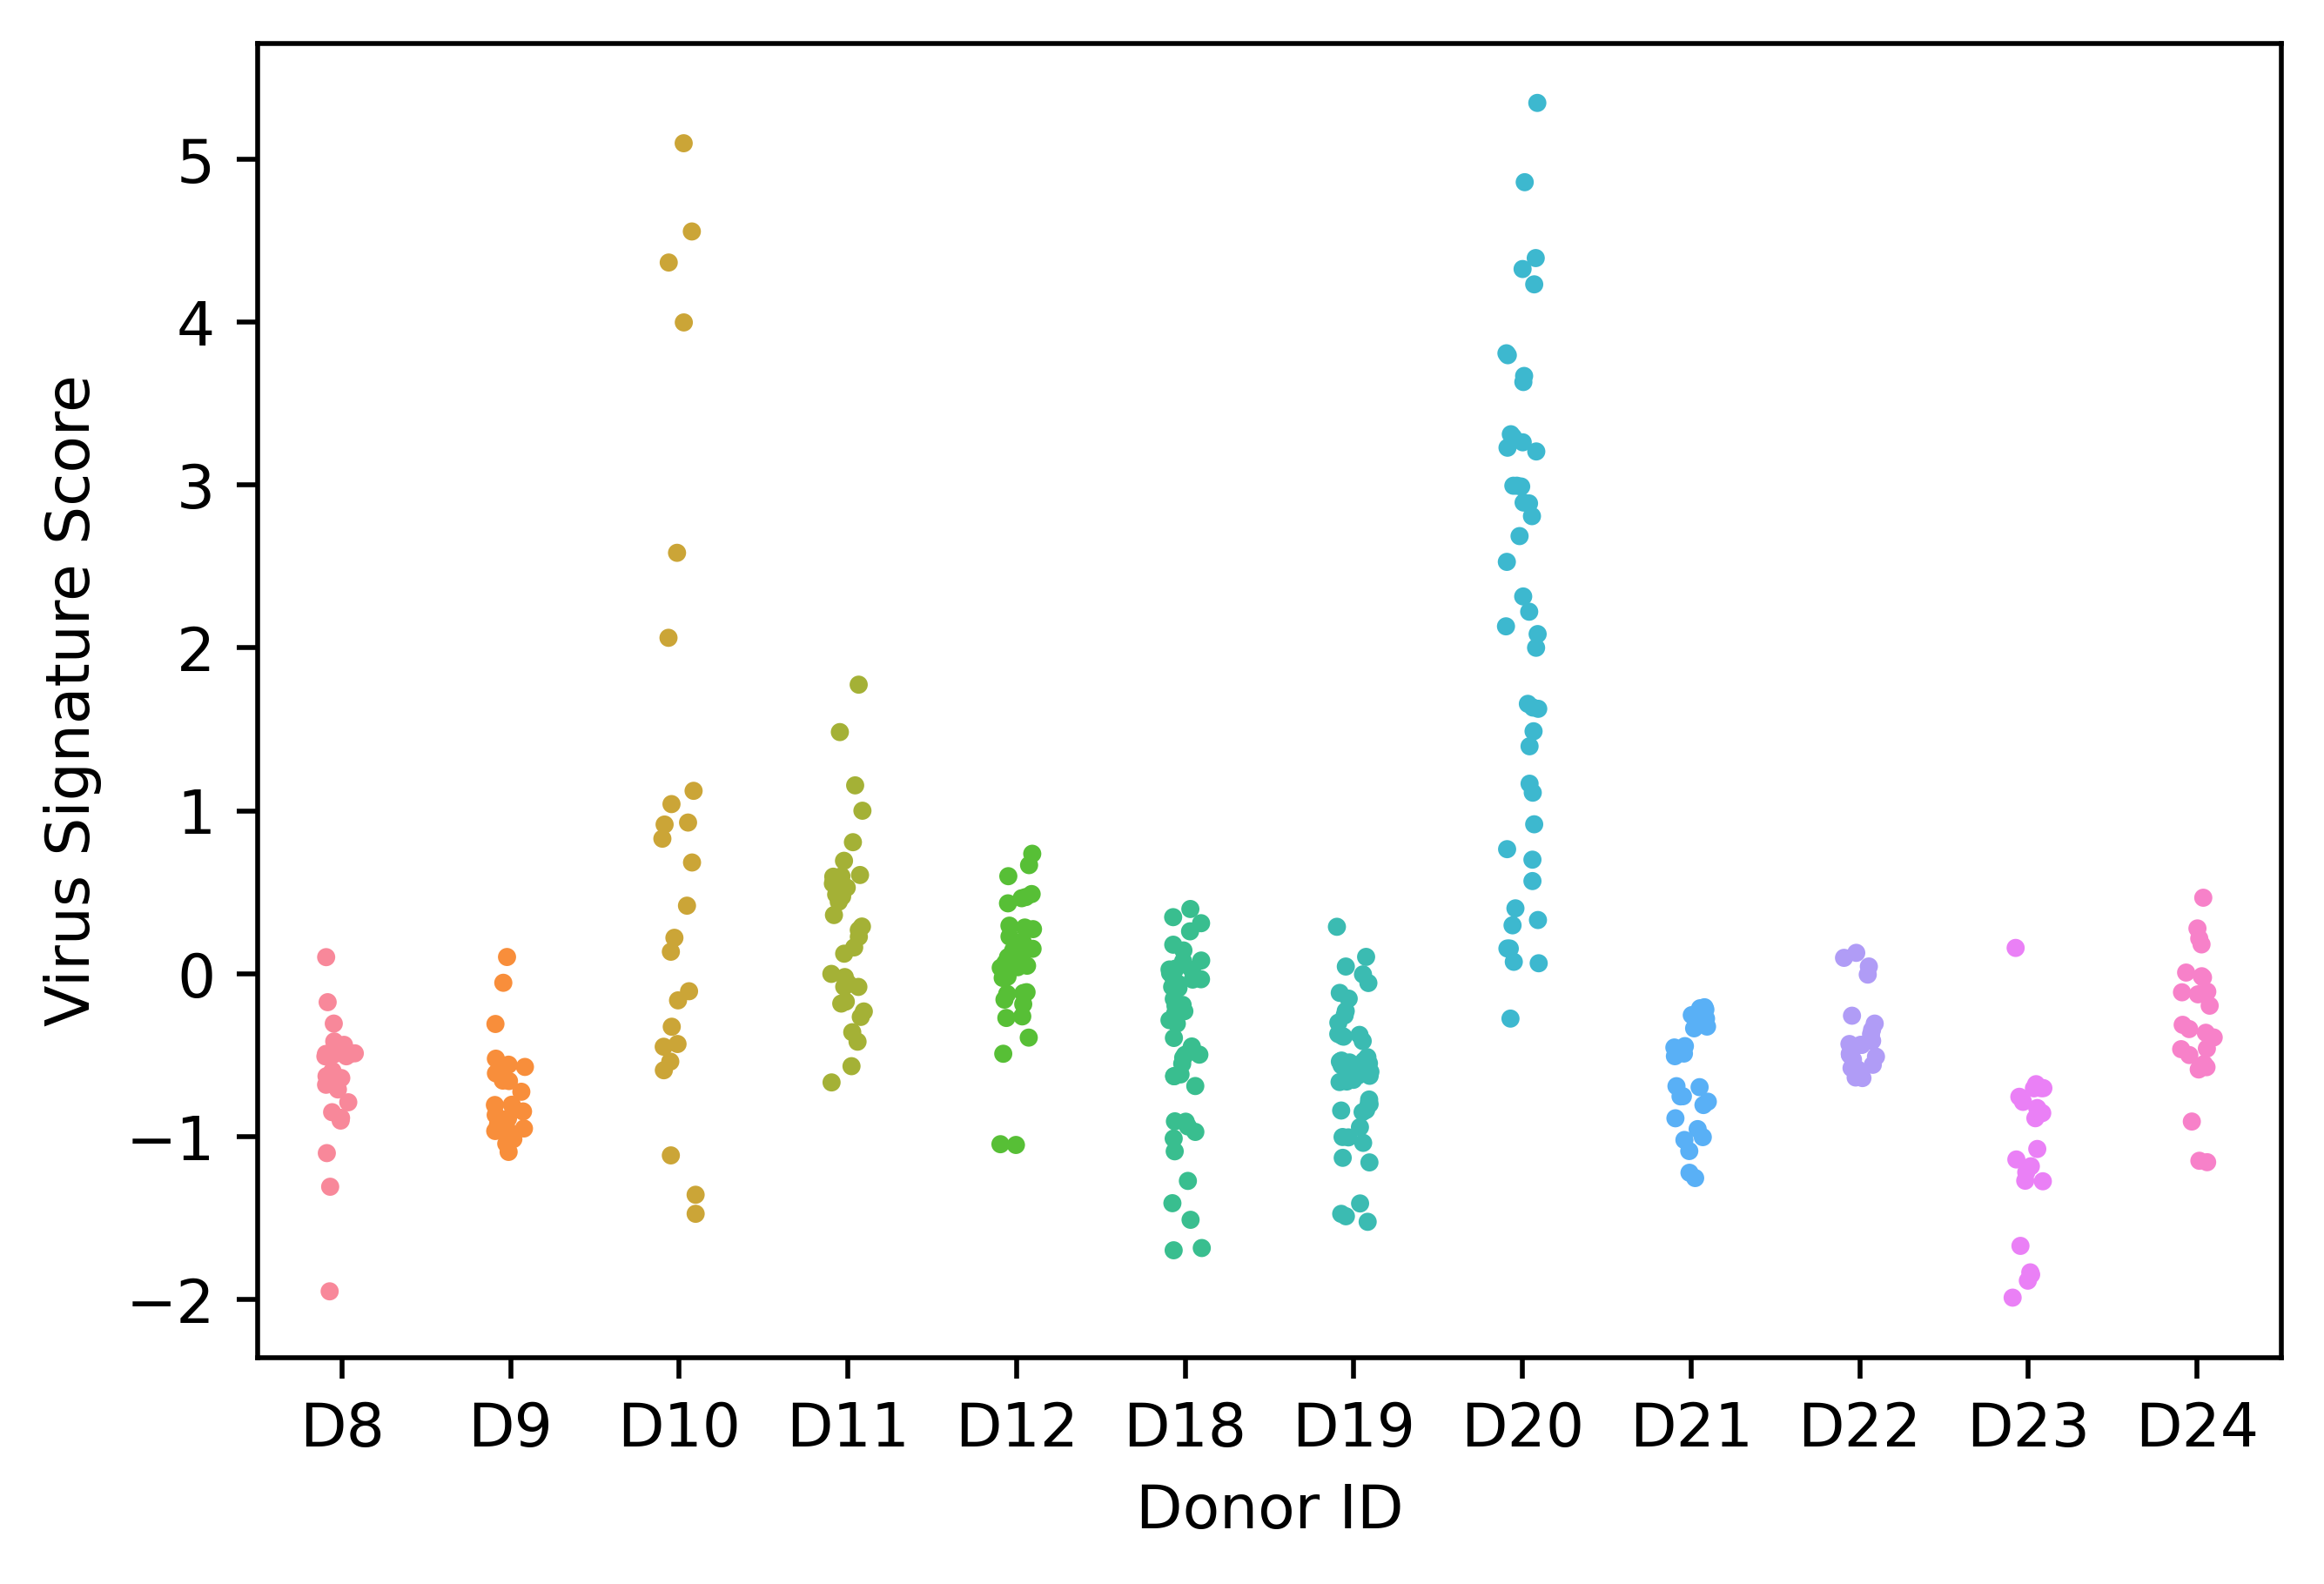

In [5]:
ax = sns.stripplot(x="Broad_ID", y="Virus", data=data.obs, size = 3)
ax.set_ylabel("Virus Signature Score")
ax.set_xlabel("Donor ID")
ax.figure.dpi = 500
ax.figure.savefig('ED_Figure_8/ED_Figure_8K.eps')

In [6]:
data.obs[['Broad_ID', 'Virus']].sort_values(by='Broad_ID').to_csv("ED_Figure_8/Source_ED_Figure_8K.csv", index=False)

### Figure 4B: WTA data Heatmaps

In [7]:
signatures = ['Virus', 'AT1', 'AT2', 'Secretory cell', 'Ciliated cell', 'Fibroblast', 'Myofibroblast', 'Vascular endothelial cell', 'Lymphatic endothelial cell', 'Macrophage', 'NK cell', 'Neutrophil', 'Plasma cell', 'Mast cell', 'B cell', 'CD4+ T cell', 'CD8+ T cell', 'Pericytes', 'Smooth muscle cell', 'Mesothelial cell', 'Basal cell']

In [8]:
dat_alv = data[data.obs['Primary_Morph'] == 'Alveolar'].copy()
dpanck = dat_alv[dat_alv.obs['segment'] == 'PanCK'].copy()
dsyto = dat_alv[dat_alv.obs['segment'] == 'Syto13'].copy()

### How to generate AOI_order values

Use modified Pegasus which will the cg object.

In addition, please remove 'Virus' from signature.

```Python
cg = pg.heatmap(dpanck, attrs = signatures, groupby = 'Patient_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = True)
AOI_order_panck = cg.dendrogram_col.dendrogram['leaves']

cg = pg.heatmap(dsyto, attrs = signatures, groupby = 'Patient_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = True)
AOI_order_syto = cg.dendrogram_col.dendrogram['leaves']
```

In [9]:
donor_order = ['D10', 'D11', 'D18', 'D19', 'D8', 'D9', 'D20', 'D12', 'D21', 'D23', 'D22', 'D24']
AOI_order_panck = [76, 3, 72, 0, 77, 75, 73, 74, 46, 53, 50, 48, 52, 1, 36, 47, 49, 51, 34, 37, 33, 6, 7, 70, 68, 69, 71, 30, 31, 32, 35, 25, 29, 26, 27, 28, 92, 90, 93, 89, 91, 94, 95, 15, 17, 64, 56, 78, 54, 57, 59, 24, 61, 67, 62, 65, 60, 63, 66, 11, 13, 12, 18, 58, 41, 44, 19, 40, 42, 43, 39, 38, 45, 55, 21, 23, 16, 14, 84, 20, 22, 79, 82, 83, 10, 87, 80, 2, 81, 88, 85, 86, 4, 5, 8, 9]
AOI_order_syto = [76, 82, 72, 84, 80, 85, 79, 81, 86, 59, 60, 70, 75, 78, 96, 127, 128, 131, 130, 126, 129, 40, 39, 41, 3, 12, 2, 7, 8, 27, 5, 11, 33, 107, 110, 112, 6, 4, 9, 71, 77, 73, 113, 108, 109, 23, 30, 25, 36, 24, 38, 111, 116, 10, 62, 55, 57, 98, 56, 115, 97, 35, 37, 64, 74, 17, 83, 1, 46, 0, 58, 61, 100, 103, 104, 26, 102, 29, 31, 101, 106, 99, 105, 28, 34, 51, 42, 53, 48, 43, 50, 52, 63, 69, 67, 68, 65, 66, 117, 121, 54, 44, 45, 47, 49, 32, 15, 87, 120, 118, 122, 124, 119, 123, 14, 20, 21, 18, 22, 114, 125, 19, 13, 16, 88, 92, 93, 89, 90, 91, 94, 95]
vmin = -1.0
vmax = 1.9

In [10]:
dpanck.obs = dpanck.obs.iloc[AOI_order_panck]
dpanck.obs['Broad_ID'].values.reorder_categories(donor_order, inplace = True)
dsyto.obs = dsyto.obs.iloc[AOI_order_syto]
dsyto.obs['Broad_ID'].values.reorder_categories(donor_order, inplace = True)

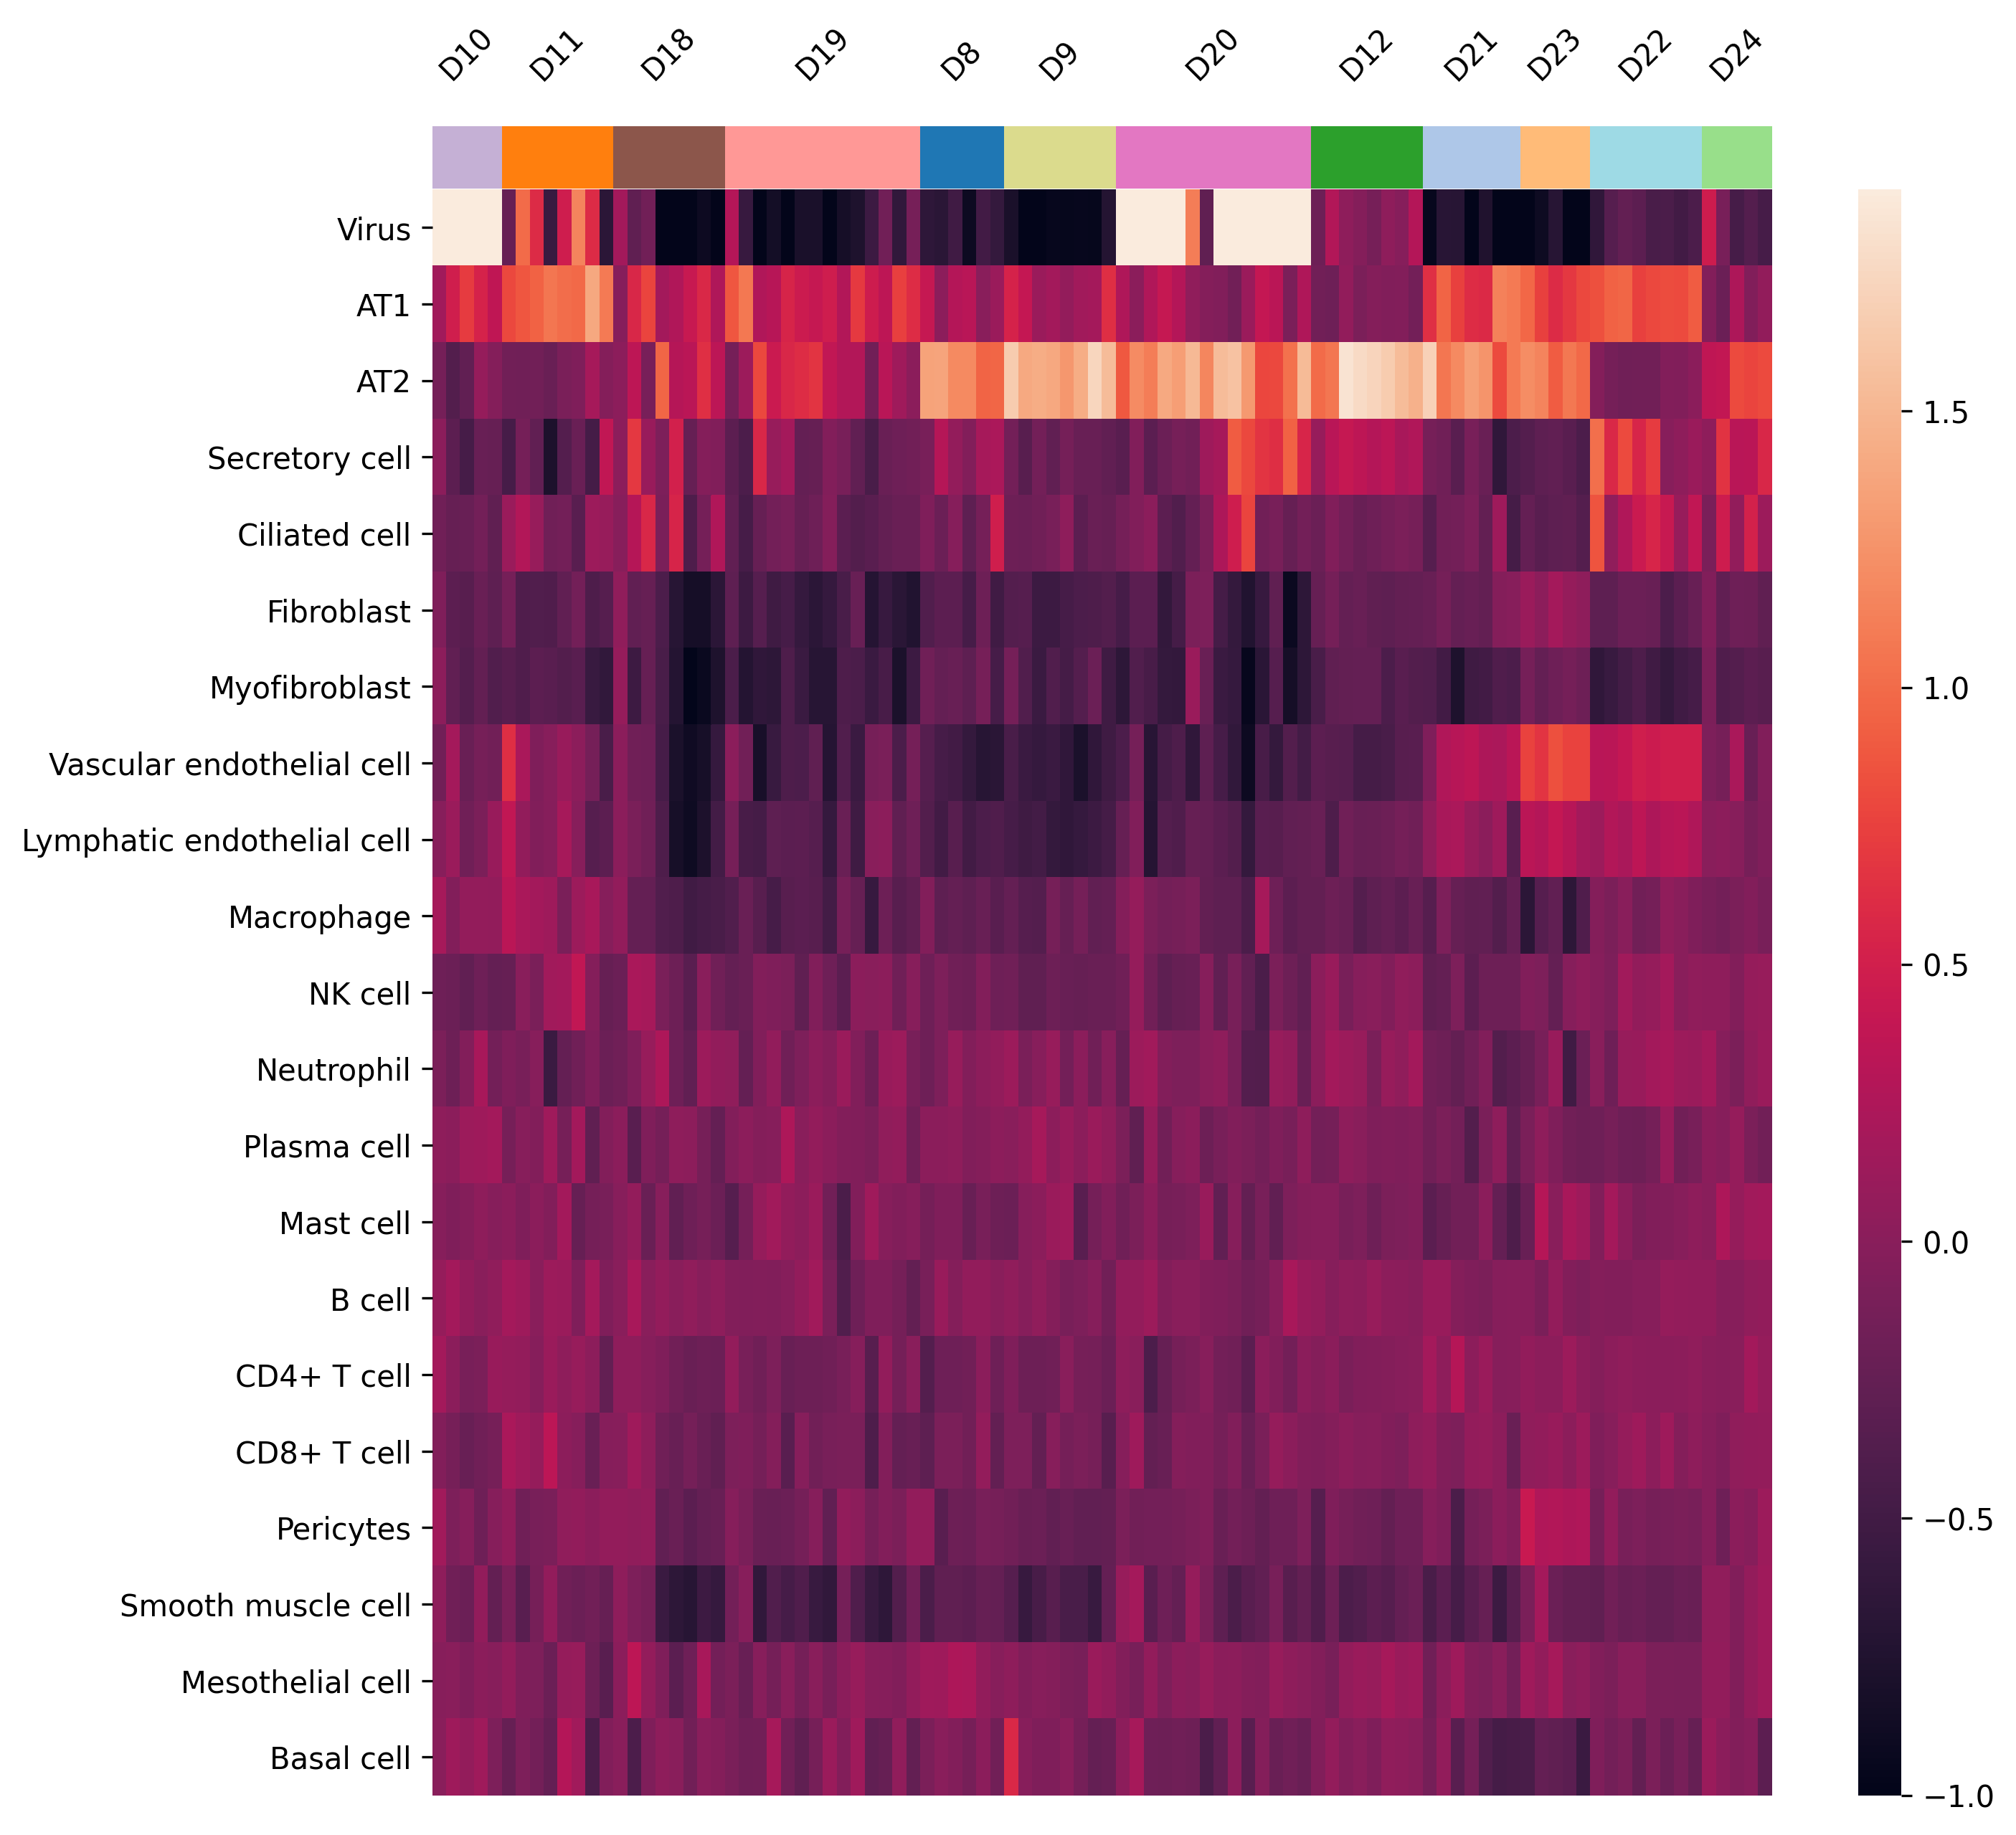

In [11]:
fig = pg.heatmap(dpanck, attrs = signatures, groupby = 'Broad_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = False, vmin = vmin, vmax = vmax, return_fig = True)
fig.savefig("Figure_4/Figure_4B_left.eps", bbox_inches = "tight")

In [12]:
df_list = [pd.DataFrame({'cluster_name': dpanck.obs['Broad_ID'].values})]
df_list.append(dpanck.obs[signatures].reset_index(drop=True))
df = pd.concat(df_list, axis=1)
idx = df['cluster_name'].values.argsort(kind='mergesort')
df = df.iloc[idx, :]
df.T.to_csv("Figure_4/Source_Figure_4B_left.csv")

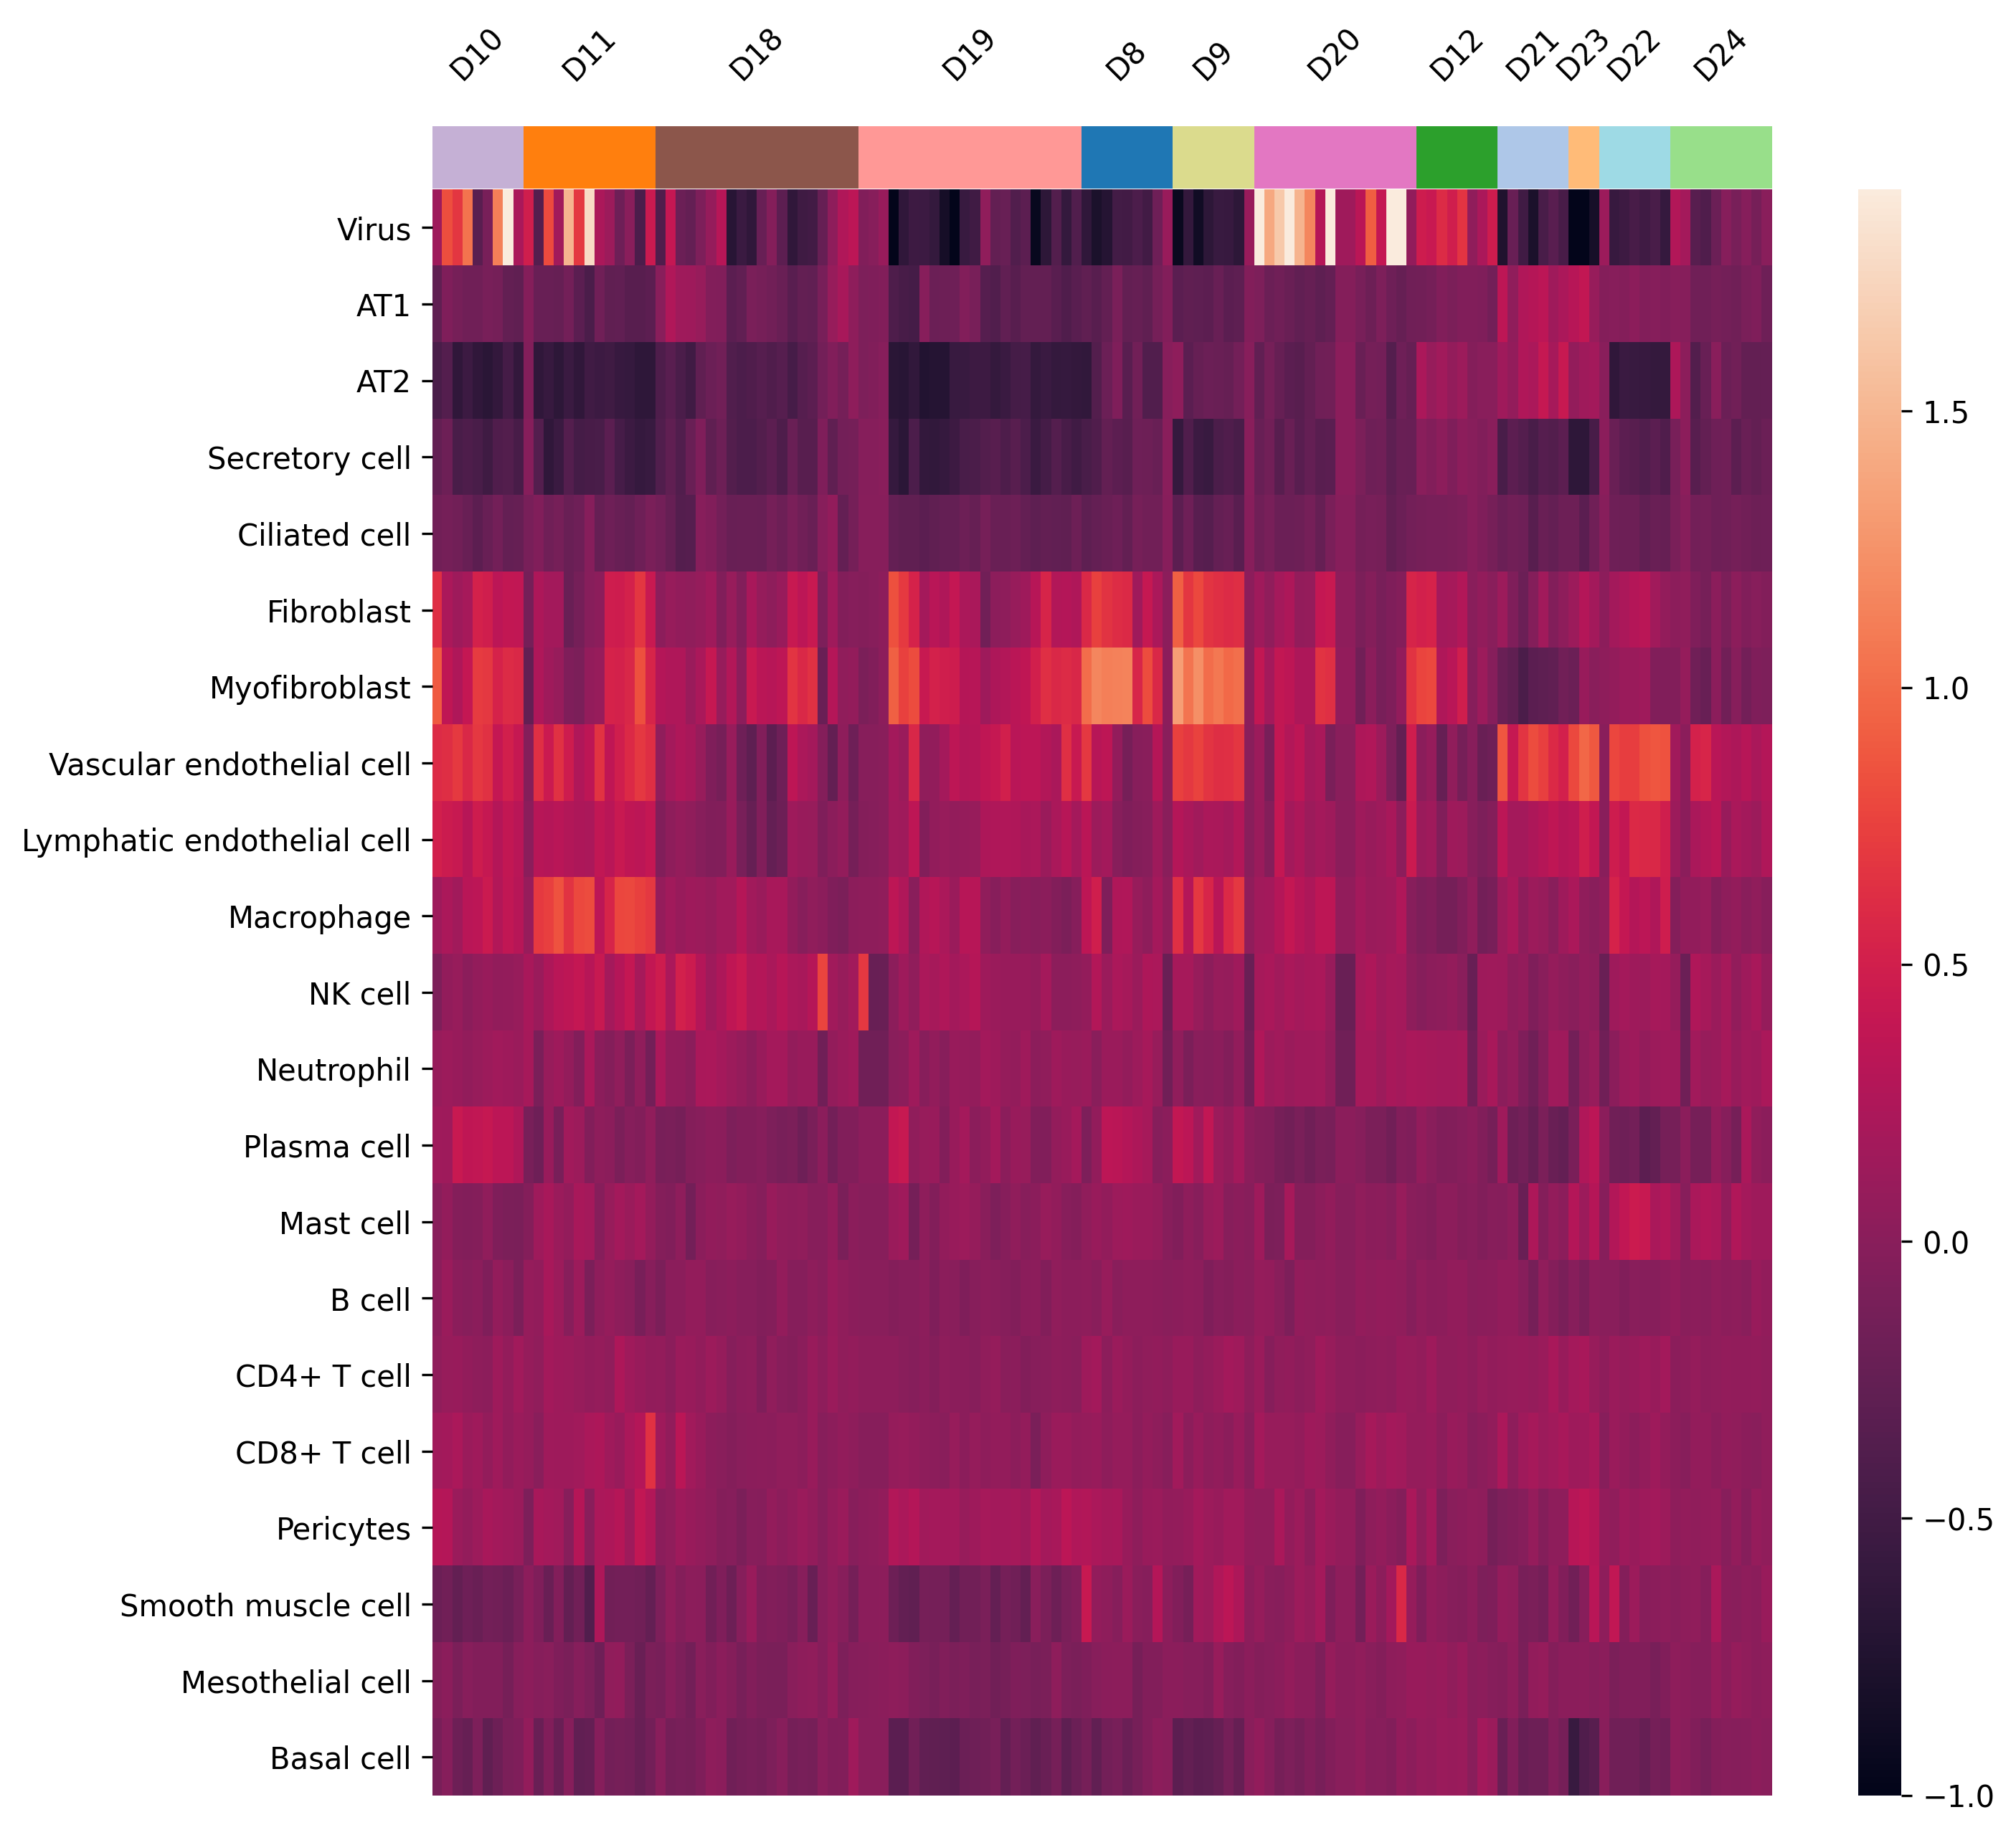

In [13]:
fig = pg.heatmap(dsyto, attrs = signatures, groupby = 'Broad_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = False, vmin = vmin, vmax = vmax, return_fig = True)
fig.savefig("Figure_4/Figure_4B_right.eps", bbox_inches = "tight")

In [14]:
df_list = [pd.DataFrame({'cluster_name': dsyto.obs['Broad_ID'].values})]
df_list.append(dsyto.obs[signatures].reset_index(drop=True))
df = pd.concat(df_list, axis=1)
idx = df['cluster_name'].values.argsort(kind='mergesort')
df = df.iloc[idx, :]
df.T.to_csv("Figure_4/Source_Figure_4B_right.csv")

# CTA data

In [15]:
input_files = [
    'data/Broad-COVID_CTA_Q3Norm_TargetCountMatrix.txt', 
    'data/Broad-COVID_CTA_SegmentProperties.txt', 
    'data/annotation_file_cta.txt'
]
data_cta = pg.read_input(input_files)
data_cta.log_transform()
data_cta._inplace_subset_obs(data_cta.obs['Patient_ID'] != 'None')
pg.calc_signature_score(data_cta, 'utils/lung_spatial_markers_CTA.gmt', n_bins = 10) # n_bins = 10 because number of genes is small.

2021-04-05 15:21:46,611 - pegasusio.nanostring_utils - WARNING - Sample IDs DSP-1001250001622-A01,DSP-1001660004764-A01,DSP-1001660004765-D08 from the segment property file are not located in the matrix file!
2021-04-05 15:21:46,630 - pegasusio.readwrite - INFO - nanostring file '['data/Broad-COVID_CTA_Q3Norm_TargetCountMatrix.txt', 'data/Broad-COVID_CTA_SegmentProperties.txt', 'data/annotation_file_cta.txt']' is loaded.
2021-04-05 15:21:46,631 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.17s.
2021-04-05 15:21:46,727 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file utils/lung_spatial_markers_CTA.gmt.
2021-04-05 15:21:46,729 - pegasus.tools.signature_score - INFO - Signature AT1: 3 out of 3 genes are used in signature score calculation.
2021-04-05 15:21:46,731 - pegasus.tools.signature_score - INFO - Signature AT2: 6 out of 6 genes are used in signature score calculation.
2021-04-05 15:21:46,734 - pegasus.tools.signature_score - INFO - Signa

### Add Broad ID

In [16]:
bwhID2broadID = {'C01': 'D22', 'C02': 'D23', 'C03': 'D24', 'S01': 'D18', 'S02': 'D19', 'S03': 'D20', 'S09': 'D21', 'S10': 'D8', 'S11': 'D9', 'S16': 'D10', 'S18': 'D11', 'S28': 'D12'}
data_cta.obs['Broad_ID'] = pd.Categorical(data_cta.obs['Patient_ID'].astype(str).map(lambda x: bwhID2broadID[x]), categories = ['D8', 'D9', 'D10', 'D11', 'D12', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24'])

### Extended Data Figure 8B: Sequence Saturation

In [17]:
df_sat = pd.DataFrame(data = {'Sequencing saturation': np.concatenate((data.obs['SequencingSaturation'].values, data_cta.obs['SequencingSaturation'].values)),
              'Assay': np.concatenate((np.repeat('WTA', data.shape[0]), np.repeat('CTA', data_cta.shape[0])))})

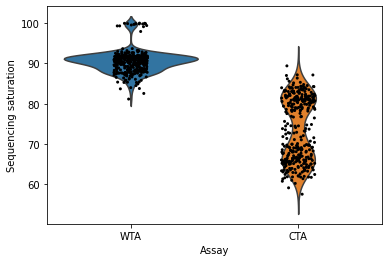

In [18]:
ax = sns.violinplot(x='Assay', y='Sequencing saturation', data=df_sat, inner = None)
ax = sns.stripplot(x='Assay', y='Sequencing saturation', data=df_sat, color = 'black', size = 3, ax = ax)
ax.figure.savefig('ED_Figure_8/ED_Figure_8B.eps', dpi = 500)

In [19]:
df_sat[['Assay', 'Sequencing saturation']].to_csv("ED_Figure_8/Source_ED_Figure_8B.csv", index=False)

In [20]:
print(df_sat[df_sat['Assay'] == 'WTA'].min())
print(df_sat[df_sat['Assay'] == 'CTA'].min())

Sequencing saturation    81.167252
Assay                          WTA
dtype: object
Sequencing saturation    57.573467
Assay                          CTA
dtype: object


### Extended Data Figure 8C: CTA Virus 

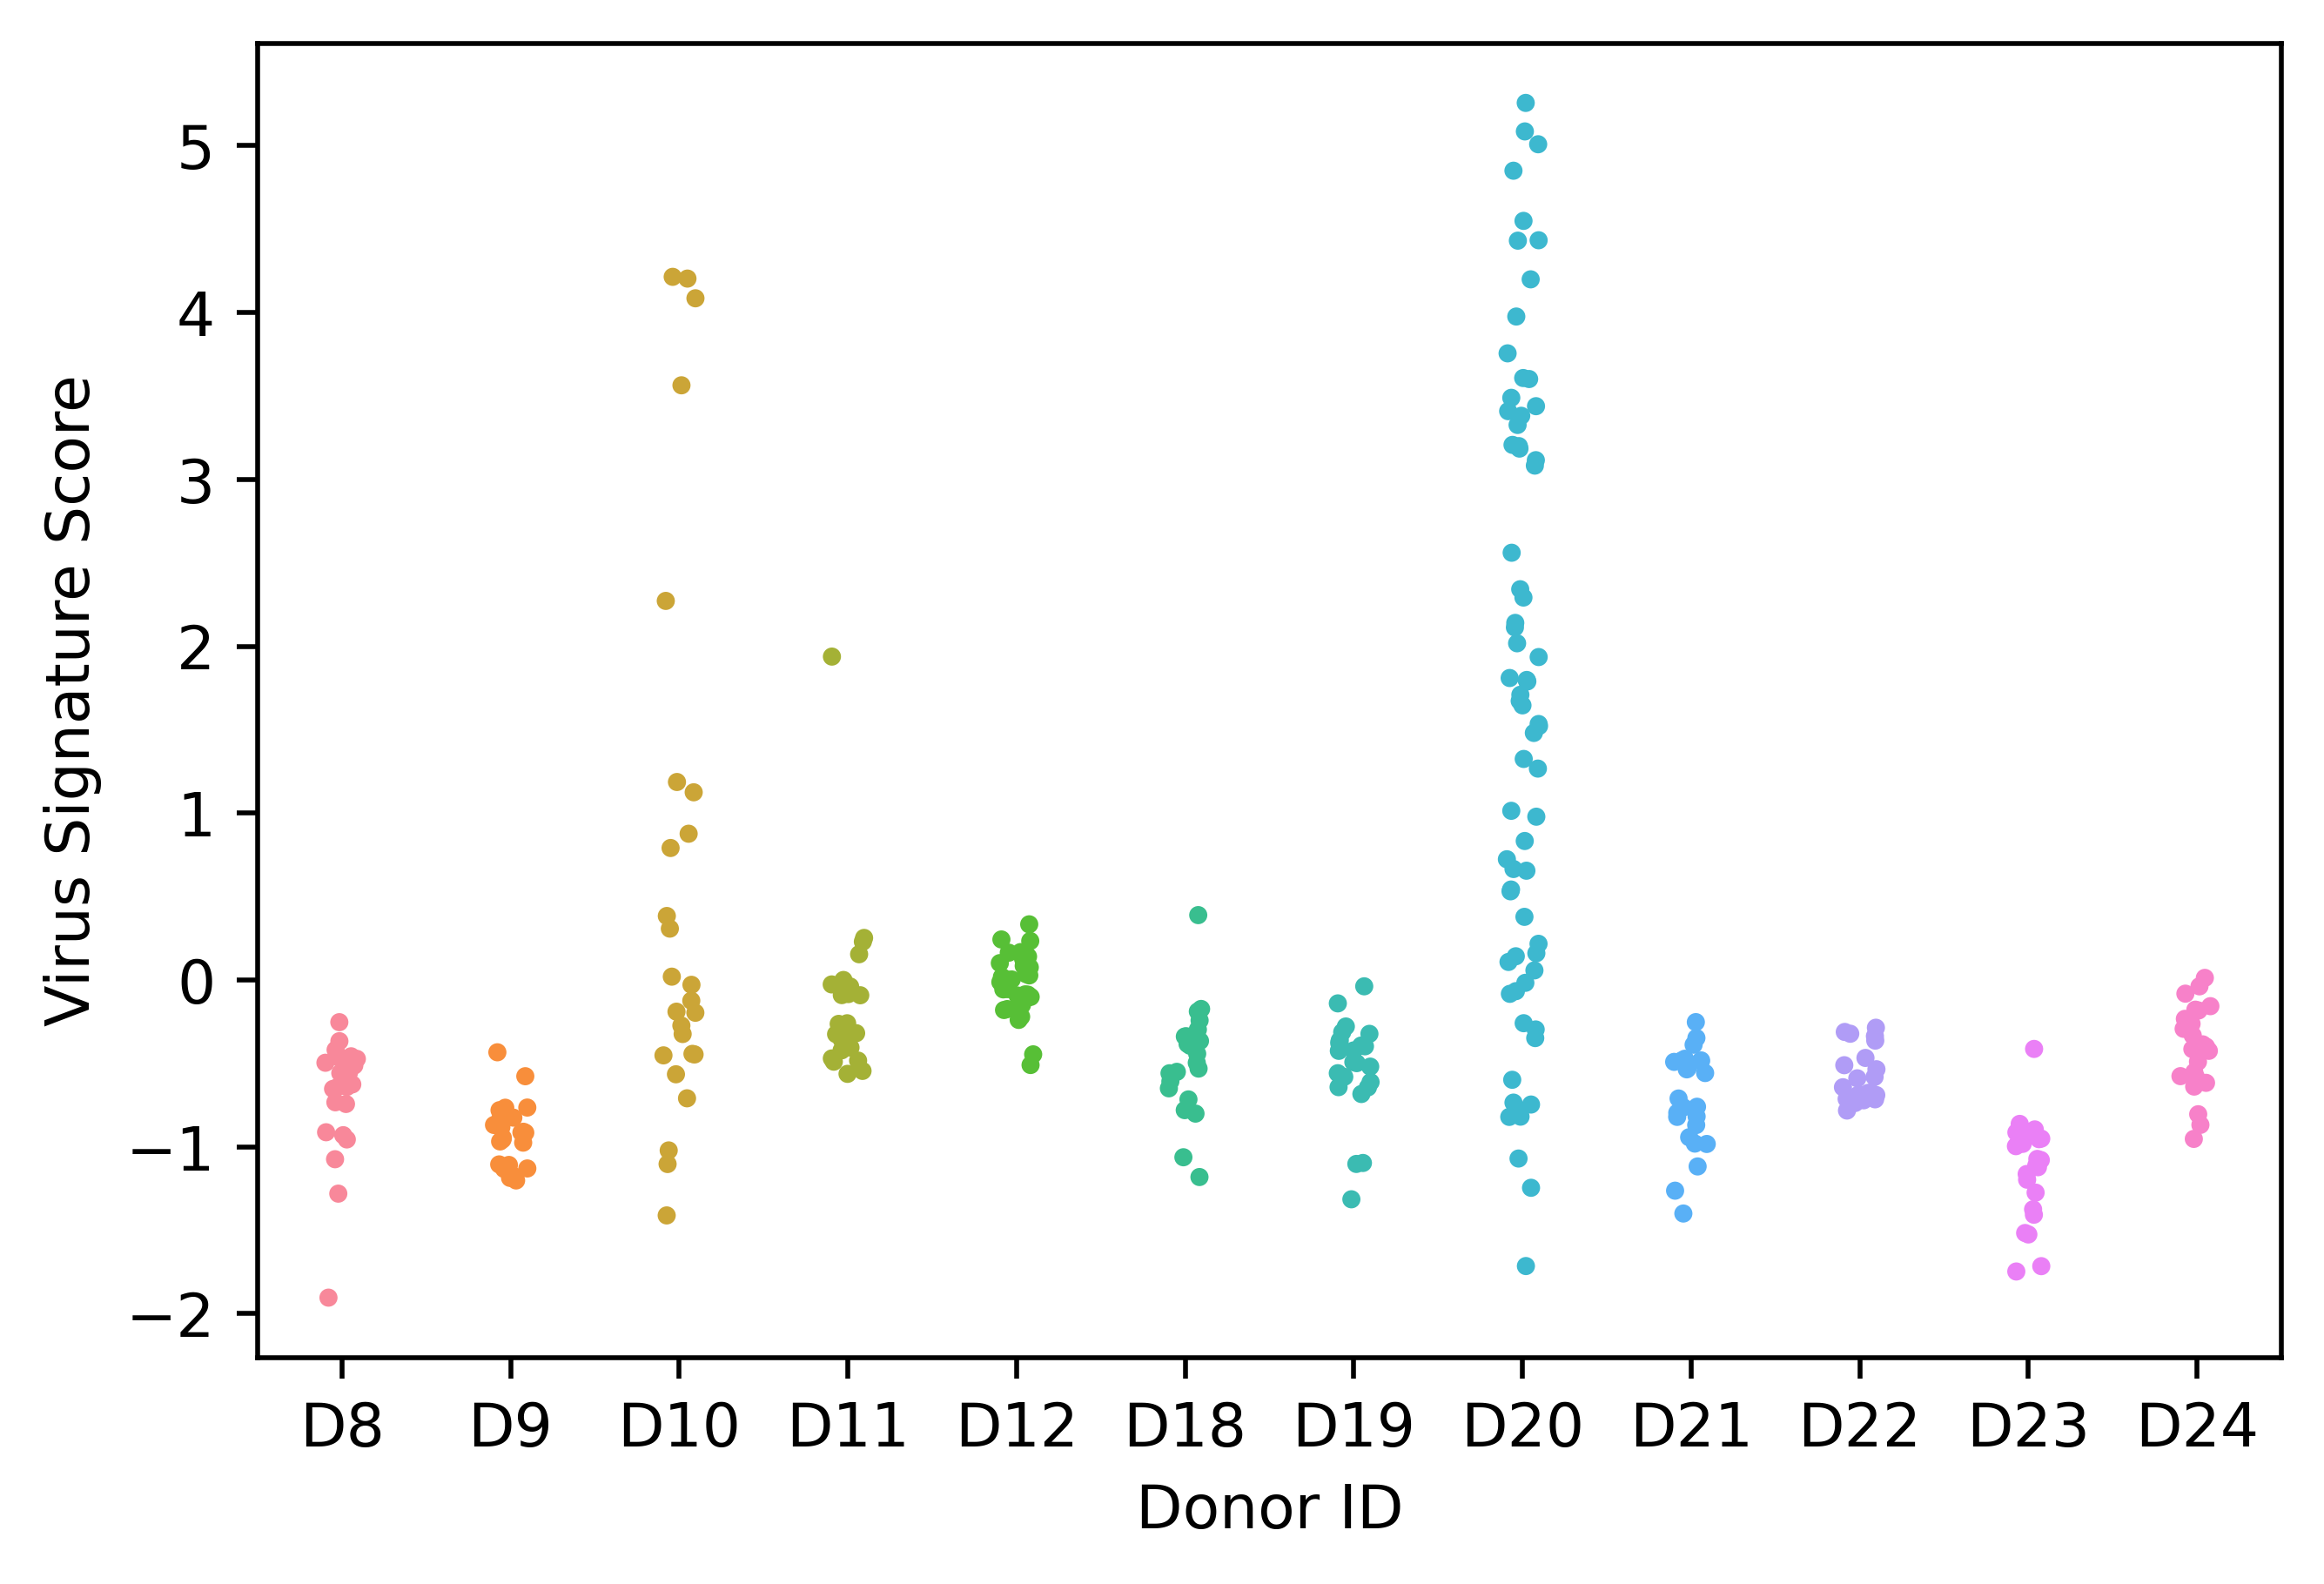

In [21]:
ax = sns.stripplot(x="Broad_ID", y="Virus", data=data_cta.obs, size = 3)
ax.set_ylabel("Virus Signature Score")
ax.set_xlabel("Donor ID")
ax.figure.dpi = 500
ax.figure.savefig('ED_Figure_8/ED_Figure_8C.eps')

In [22]:
data_cta.obs[['Broad_ID', 'Virus']].sort_values(by='Broad_ID').to_csv("ED_Figure_8/Source_ED_Figure_8C.csv", index=False)

In [23]:
signatures = ['Virus', 'AT1', 'AT2', 'Secretory cell', 'Ciliated cell', 'Fibroblast', 'Myofibroblast', 'Vascular endothelial cell', 'Lymphatic endothelial cell', 'Macrophage', 'NK cell', 'Neutrophil', 'Plasma cell', 'Mast cell', 'B cell', 'CD4+ T cell', 'CD8+ T cell', 'Pericytes', 'Smooth muscle cell', 'Mesothelial cell', 'Basal cell']

In [24]:
dat_alv = data_cta[data_cta.obs['Primary_Morph'] == 'Alveolar'].copy()
dpanck = dat_alv[dat_alv.obs['segment'] == 'PanCK'].copy()
dsyto = dat_alv[dat_alv.obs['segment'] == 'Syto13'].copy()

### How to generate AOI_order values

Use modified Pegasus which will the cg object.

In addition, please remove 'Virus' from signature.

```Python
signatures = ['AT1', 'AT2', 'Secretory cell', 'Ciliated cell', 'Fibroblast', 'Myofibroblast', 'Vascular endothelial cell', 'Lymphatic endothelial cell', 'Macrophage', 'NK cell', 'Neutrophil', 'Plasma cell', 'Mast cell', 'B cell', 'CD4+ T cell', 'CD8+ T cell', 'Pericytes', 'Smooth muscle cell', 'Mesothelial cell', 'Basal cell']

cg = pg.heatmap(dpanck, attrs = signatures, groupby = 'Patient_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = True)
AOI_cta_order_panck = cg.dendrogram_col.dendrogram['leaves']
print(AOI_cta_order_panck)

cg = pg.heatmap(dsyto, attrs = signatures, groupby = 'Patient_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = True)
AOI_cta_order_syto = cg.dendrogram_col.dendrogram['leaves']
print(AOI_cta_order_syto)

print(dpanck.obs[signatures].max().max())
print(dpanck.obs[signatures].min().min())
print(dsyto.obs[signatures].max().max())
print(dsyto.obs[signatures].min().min())
```

In [25]:
donor_order = ['D10', 'D11', 'D18', 'D19', 'D8', 'D9', 'D20', 'D12', 'D21', 'D23', 'D22', 'D24']
AOI_cta_order_panck = [55, 83, 6, 10, 24, 23, 28, 26, 27, 22, 25, 29, 53, 51, 50, 54, 49, 52, 56, 59, 9, 5, 13, 7, 11, 12, 34, 31, 33, 30, 32, 82, 57, 62, 60, 64, 76, 78, 75, 86, 8, 58, 61, 63, 79, 74, 80, 85, 77, 81, 3, 0, 2, 1, 4, 17, 20, 65, 66, 67, 69, 70, 41, 68, 38, 71, 72, 73, 84, 42, 35, 40, 36, 37, 48, 43, 45, 47, 44, 46, 39, 14, 15, 21, 19, 16, 18]
AOI_cta_order_syto = [45, 46, 50, 55, 52, 58, 47, 48, 57, 51, 53, 54, 43, 56, 49, 42, 44, 4, 1, 91, 3, 0, 2, 95, 94, 97, 93, 96, 20, 22, 23, 41, 18, 19, 25, 21, 24, 109, 71, 76, 69, 73, 74, 78, 79, 80, 81, 72, 75, 70, 77, 101, 106, 92, 59, 60, 62, 65, 104, 64, 67, 68, 112, 102, 111, 103, 108, 99, 98, 100, 107, 110, 61, 63, 66, 27, 28, 29, 32, 26, 30, 31, 113, 9, 105, 11, 13, 6, 16, 15, 84, 82, 85, 86, 90, 87, 88, 83, 89, 5, 14, 17, 7, 8, 12, 33, 34, 37, 38, 39, 10, 40, 35, 36]
vmin = -1.01
vmax = 2.06

In [26]:
dpanck.obs = dpanck.obs.iloc[AOI_cta_order_panck]
dpanck.obs['Broad_ID'].values.reorder_categories(donor_order, inplace = True)
dsyto.obs = dsyto.obs.iloc[AOI_cta_order_syto]
dsyto.obs['Broad_ID'].values.reorder_categories(donor_order, inplace = True)

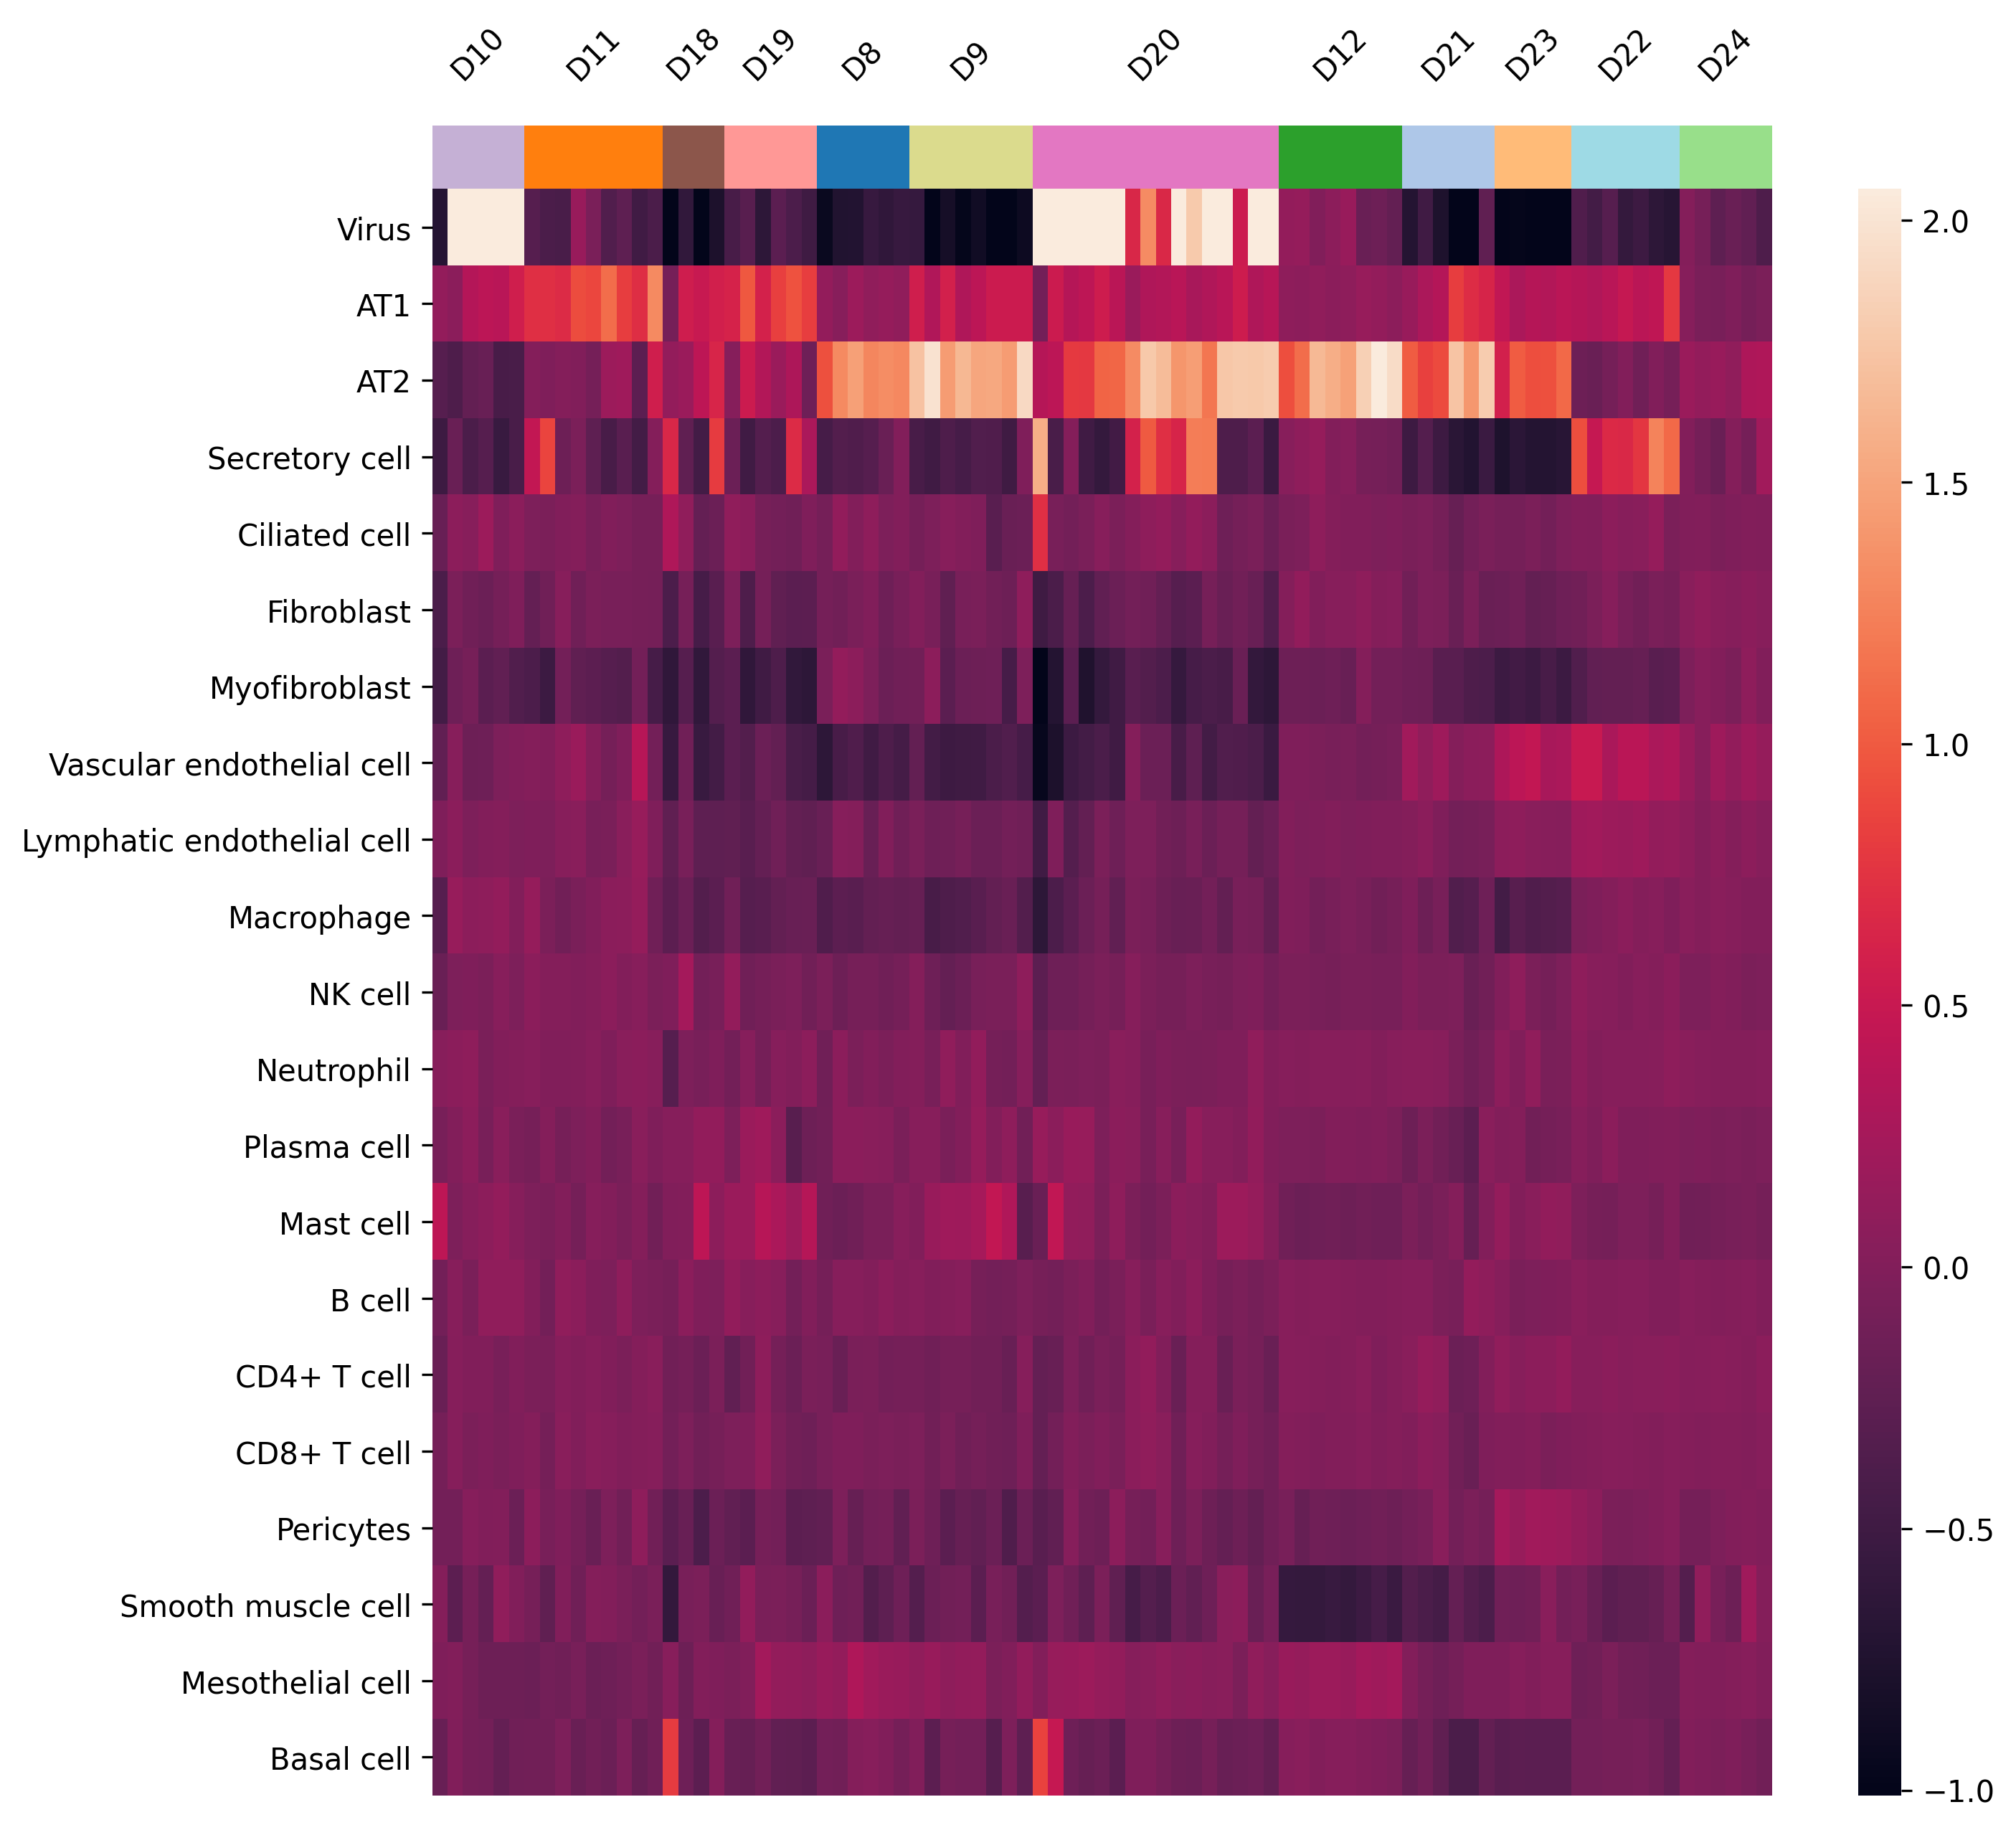

In [27]:
fig = pg.heatmap(dpanck, attrs = signatures, groupby = 'Broad_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = False, vmin = vmin, vmax = vmax, return_fig = True)
fig.savefig("ED_Figure_8/ED_Figure_8G_left.eps", bbox_inches = "tight")

In [28]:
df_list = [pd.DataFrame({'cluster_name': dpanck.obs['Broad_ID'].values})]
df_list.append(dpanck.obs[signatures].reset_index(drop=True))
df = pd.concat(df_list, axis=1)
idx = df['cluster_name'].values.argsort(kind='mergesort')
df = df.iloc[idx, :]
df.T.to_csv("ED_Figure_8/Source_ED_Figure_8G_left.csv")

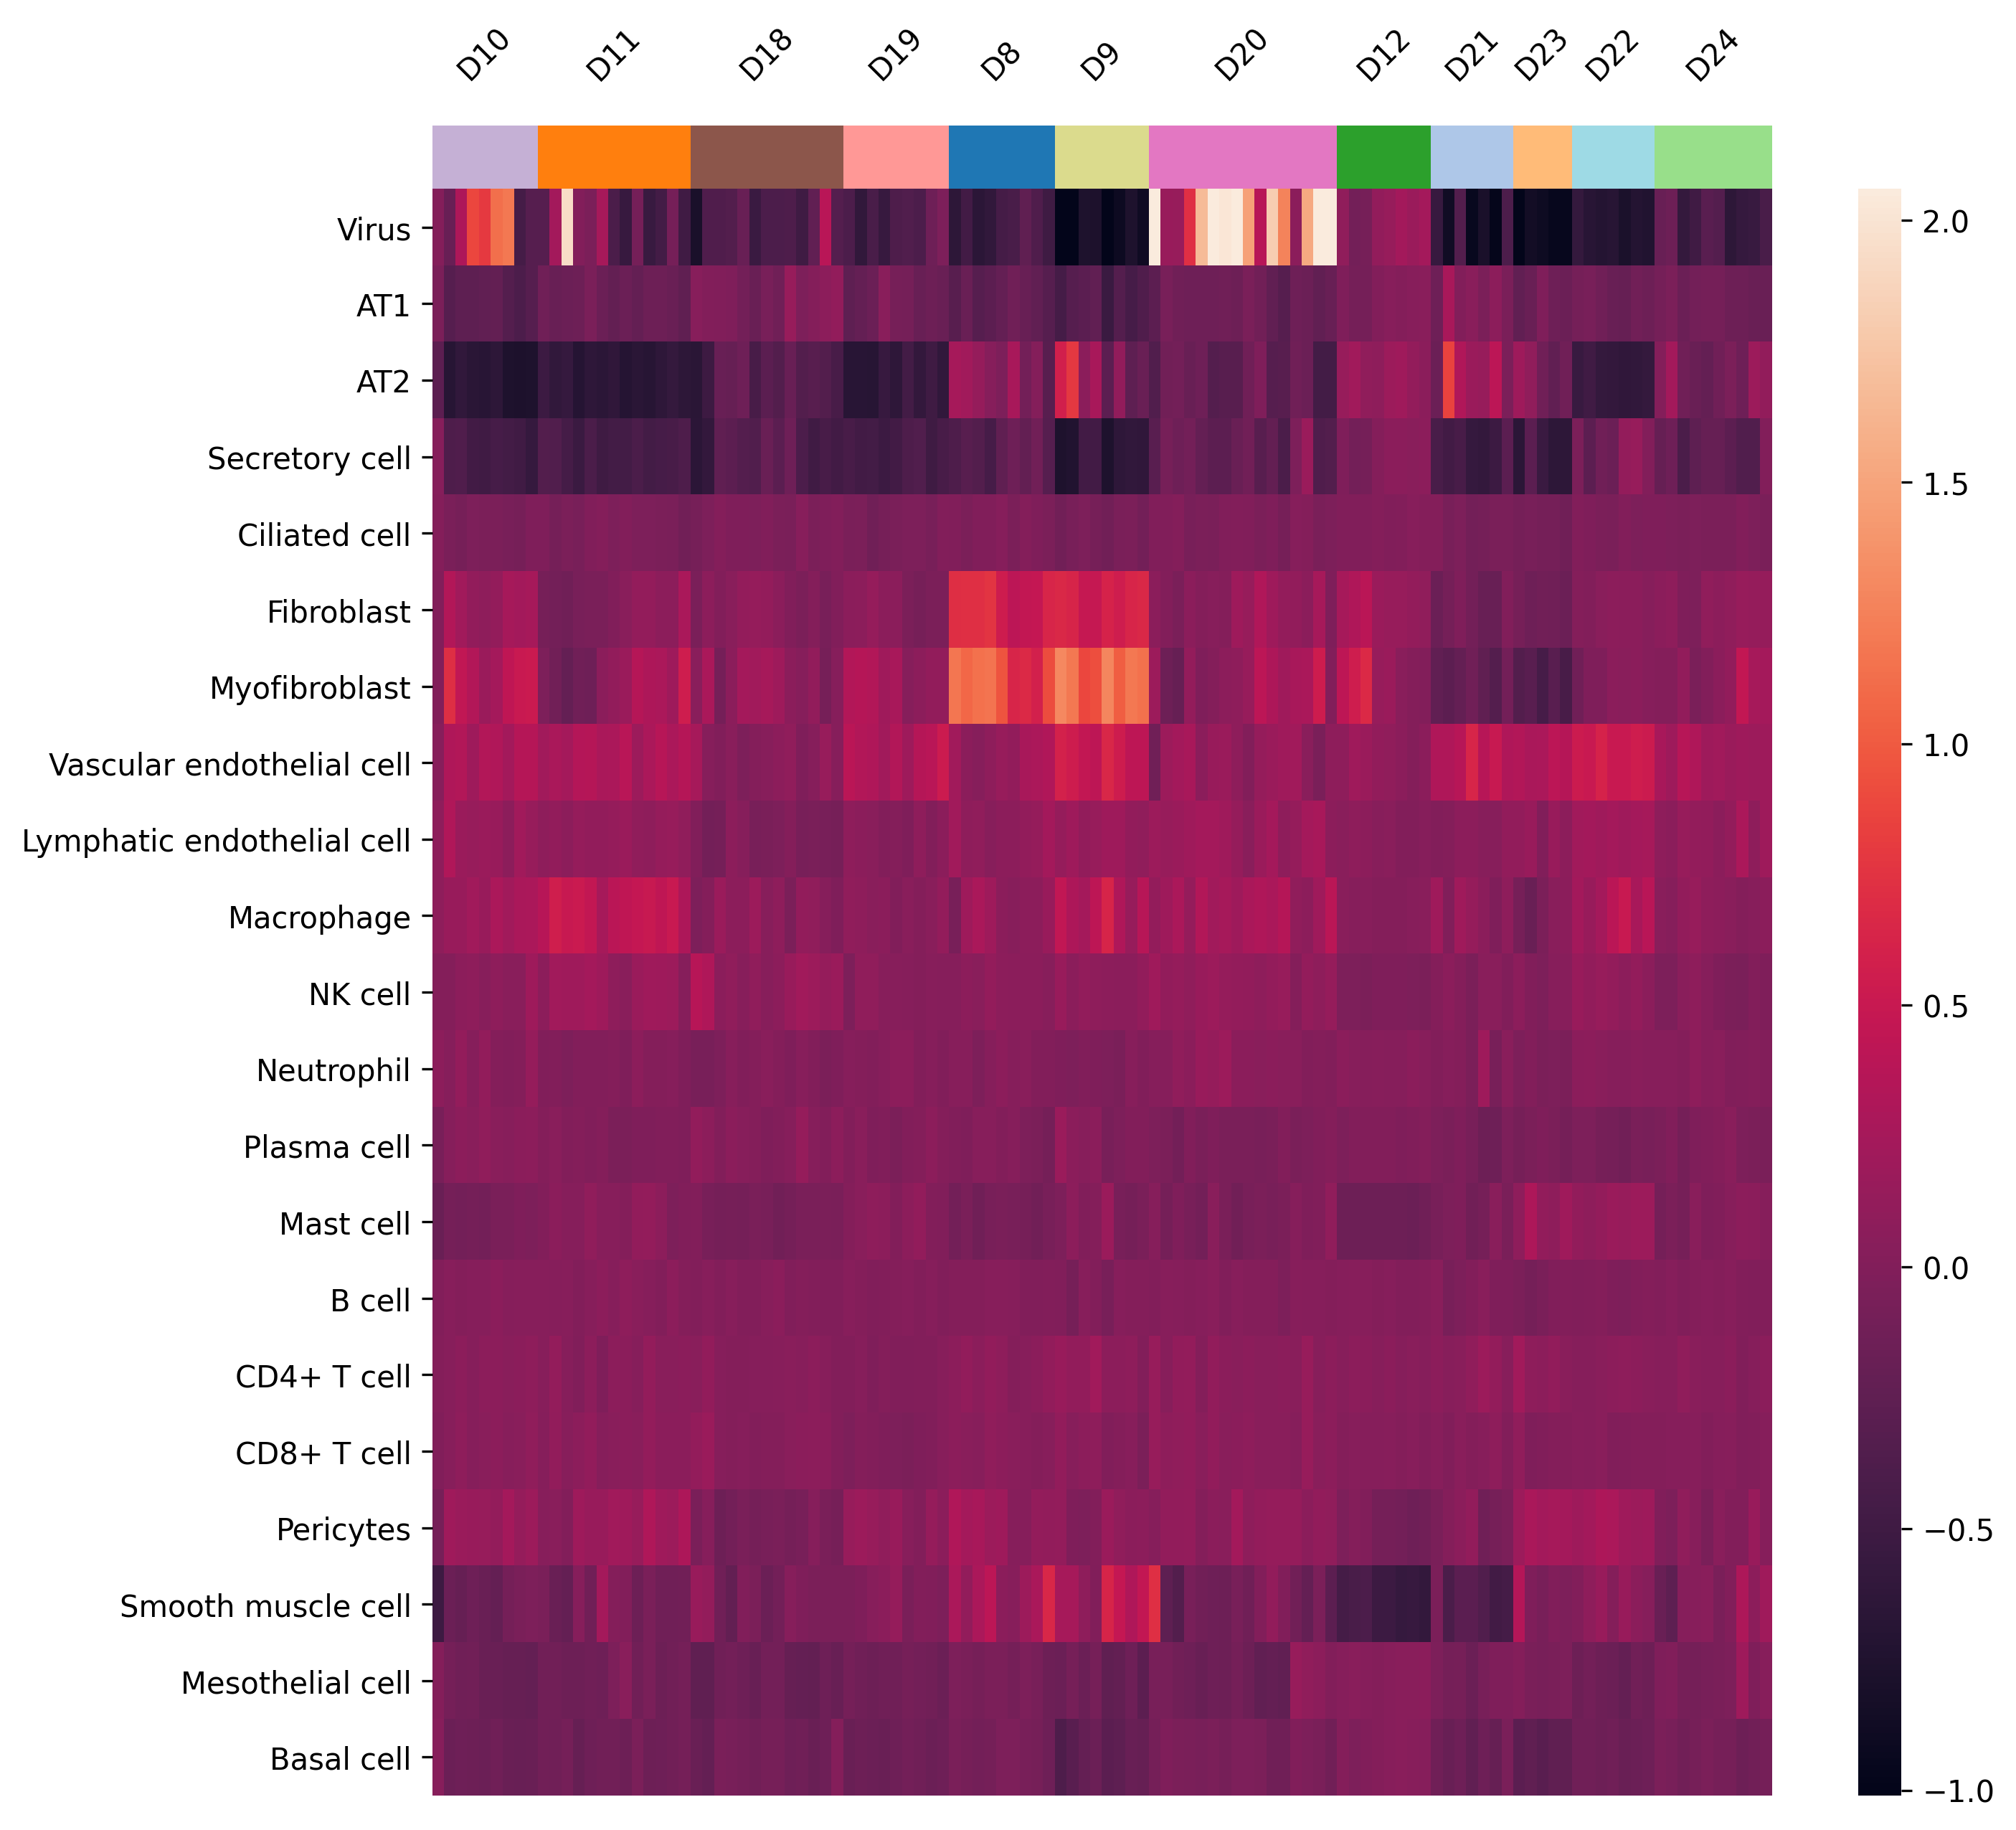

In [29]:
fig = pg.heatmap(dsyto, attrs = signatures, groupby = 'Broad_ID', on_average = False, switch_axes = True, attrs_cluster = False, groupby_cluster = False, vmin = vmin, vmax = vmax, return_fig = True)
fig.savefig("ED_Figure_8/ED_Figure_8G_right.eps", bbox_inches = "tight")

In [30]:
df_list = [pd.DataFrame({'cluster_name': dsyto.obs['Broad_ID'].values})]
df_list.append(dsyto.obs[signatures].reset_index(drop=True))
df = pd.concat(df_list, axis=1)
idx = df['cluster_name'].values.argsort(kind='mergesort')
df = df.iloc[idx, :]
df.T.to_csv("ED_Figure_8/Source_ED_Figure_8G_right.csv")